## Use Case 3: Colocate different data

In [ ]:
# download sample files
!wget -P data -nc ftp://ftp.nersc.no/nansat/test_data/obpg_l2/A2015121113500.L2_LAC.NorthNorwegianSeas.hdf
!wget -P data -nc ftp://ftp.nersc.no/nansat/test_data/obpg_l2/A2015122122000.L2_LAC.NorthNorwegianSeas.hdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image   
%matplotlib inline

from nansat import *

### Open MODIS/Aqua files with chlorophyll in the North Sea and fetch data

In [2]:
n1 = Nansat('data/A2015121113500.L2_LAC.NorthNorwegianSeas.hdf')
chlor_a1 = n1['chlor_a']

n2 = Nansat('data/A2015122122000.L2_LAC.NorthNorwegianSeas.hdf')
chlor_a2 = n2['chlor_a']

### Plot chlorophyll-a maps in swath projection

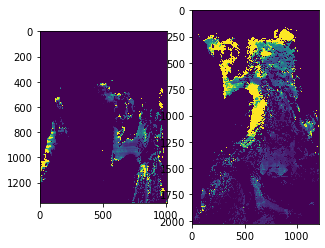

In [3]:
plt.figure(figsize=(5,5))
plt.subplot(121)
plt.imshow(chlor_a1, vmin=0, vmax=3)
plt.subplot(122)
plt.imshow(chlor_a2, vmin=0, vmax=3)

## Colocate data. Reproject both images onto the same Domain.

In [4]:
# define domain in longlat projection
d = Domain('+proj=stere +lat_0=58 +lon_0=5 +no_defs',
           '-te -300000 -300000 300000 300000 -tr 3000 3000')

# reproject first image and get matrix with reprojected chlorophyll
n1.reproject(d)
chlor_a1 = n1['chlor_a']

# reproject second image and get matrix with reprojected chlorophyll
n2.reproject(d)
chlor_a2 = n2['chlor_a']

# get mask of land and set values of land pixels to NAN (not-a-number)
mask1 = n1.watermask()[1]
chlor_a1[mask1 == 2] = np.nan
chlor_a2[mask1 == 2] = np.nan

# prepare landmask for plotting: land pixels=1, water pixels=NaN
landmask = 1 - mask1.astype(float)
landmask[landmask == 0] = np.nan

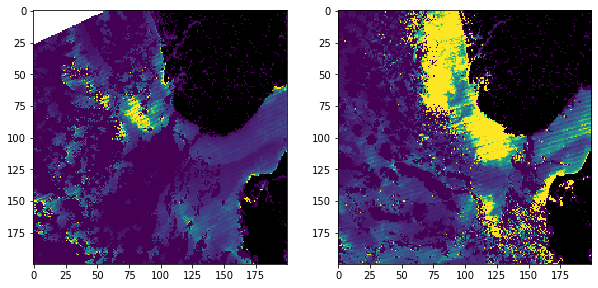

In [5]:
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(chlor_a1, vmin=0, vmax=5)
plt.imshow(landmask, cmap='gray')

plt.subplot(122)
plt.imshow(chlor_a2, vmin=0, vmax=5)
plt.imshow(landmask, cmap='gray')

plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


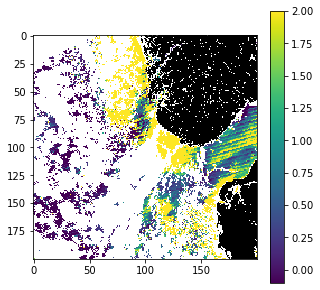

In [6]:
# replace negative values (clouds) by NAN
chlor_a1[chlor_a1 < 0] = np.nan
chlor_a2[chlor_a2 < 0] = np.nan

# find difference
chlor_diff = chlor_a2 - chlor_a1

# plot
plt.figure(figsize=(5,5))
plt.imshow(chlor_diff, vmin=-0.1, vmax=2);plt.colorbar()
plt.imshow(landmask, cmap='gray')
plt.show()

2015-05-01 11:36:49+00:00


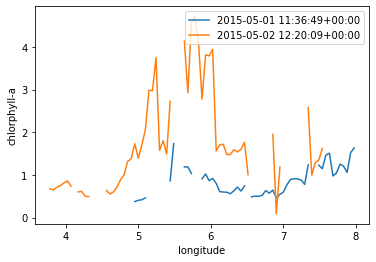

In [7]:
# get transect - vector of data from 2D matrix from known locations
points = [[200, 75], [150, 150]]
t1 = n1.get_transect(points, ['chlor_a'], lonlat=False)
chl1 = t1['chlor_a']
lon1 = t1['lon']
lat1 = t1['lat']

t2 = n2.get_transect(points, ['chlor_a'], lonlat=False)
chl2 = t2['chlor_a']


# replace negative values with NAN
chl1 = np.array(chl1)
chl2 = np.array(chl2)
chl1[(chl1 < 0) + (chl1 > 5)] = np.nan
chl2[(chl2 < 0) + (chl2 > 5)] = np.nan
print (n1.time_coverage_start)

# plot
plt.plot(lon1, chl1, '-', label=n1.time_coverage_start)
plt.plot(lon1, chl2, '-', label=n2.time_coverage_start)
plt.legend()
plt.xlabel('longitude')
plt.ylabel('chlorphyll-a')
plt.show()
